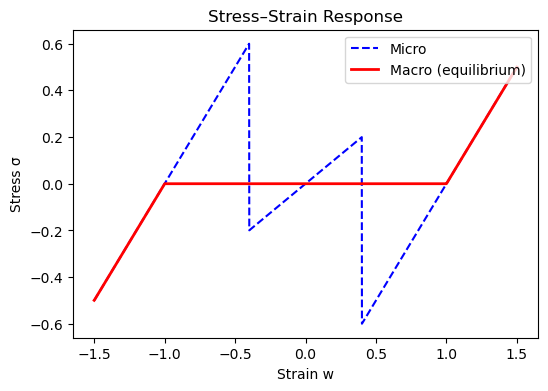

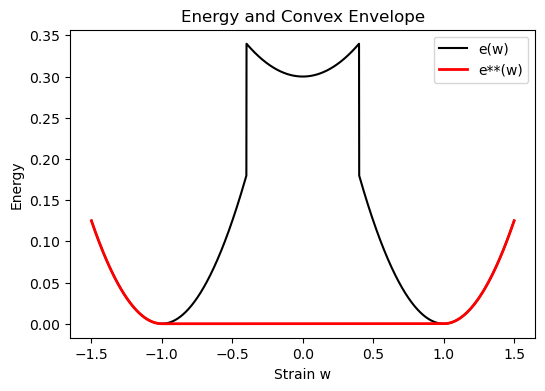

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# Parameters
# ============================================================
t = 0.4
tau = 2.0
Gamma = 1.0 - 1.0/tau
eta = 1 - t

w = np.linspace(-1.5, 1.5, 2500)

# ============================================================
# Micro energy e(w)
# ============================================================
e = np.zeros_like(w)

mask1 = w < -t
mask2 = (w >= -t) & (w <= t)
mask3 = w > t

e[mask1] = 0.5*(w[mask1] + 1)**2
e[mask2] = 0.5*(Gamma*w[mask2]**2 + eta)
e[mask3] = 0.5*(w[mask3] - 1)**2

# ============================================================
# Micro stress: sigma = e'(w)
# ============================================================
sigma_micro = np.zeros_like(w)
sigma_micro[mask1] = w[mask1] + 1
sigma_micro[mask2] = Gamma*w[mask2]
sigma_micro[mask3] = w[mask3] - 1

# ============================================================
# Convex envelope (equilibrium energy)
# ============================================================
def lower_convex_envelope(x, y):
    def slope(i, j):
        return (y[j] - y[i]) / (x[j] - x[i])

    hull = []
    for i in range(len(x)):
        hull.append(i)
        while len(hull) >= 3:
            i1, i2, i3 = hull[-3], hull[-2], hull[-1]
            if slope(i1, i2) >= slope(i2, i3):
                hull.pop(-2)
            else:
                break
    return np.array(hull, dtype=int)

idx = lower_convex_envelope(w, e)
w_h, e_h = w[idx], e[idx]

# Relaxed energy and macro stress
e_relaxed = np.interp(w, w_h, e_h)
sigma_macro = np.gradient(e_relaxed, w)

# ============================================================
# Plot 1 — Stress–strain
# ============================================================
plt.figure(figsize=(6,4))
plt.plot(w, sigma_micro, '--', color='blue', linewidth=1.5,
         label="Micro")
plt.plot(w, sigma_macro, color='red', linewidth=2,
         label="Macro (equilibrium)")

plt.xlabel("Strain w")
plt.ylabel("Stress σ")
plt.title("Stress–Strain Response")
plt.legend()
plt.show()

# ============================================================
# Plot 2 — Energy
# ============================================================
plt.figure(figsize=(6,4))
plt.plot(w, e, color='black', linewidth=1.5,
         label="e(w)")
plt.plot(w, e_relaxed, color='red', linewidth=2,
         label="e**(w)")

plt.xlabel("Strain w")
plt.ylabel("Energy")
plt.title("Energy and Convex Envelope")
plt.legend()
plt.show()
